In [37]:
import pandas as pd

import configparser
config = configparser.ConfigParser()

# read the cfg file
config.read('../datasets/aws.cfg')

AWS_ACCESS_KEY = config['AWSDEV']['aws_access_key']
AWS_SECRET_KEY = config['AWSDEV']['aws_secret_key']

In [39]:
df = pd.read_csv('s3://techcatalyst-raw/SalesRaw/sales_data.csv',
                 parse_dates=['DateTime'],
               storage_options={
                   'key' : AWS_ACCESS_KEY,
                   'secret' : AWS_SECRET_KEY
               })

In [40]:
df.head()

,DateTime,Time Zone,Sales Amount,Country,Sales Person
0,2024-06-15 05:56:00,Australia/Sydney,NaN,Australia,David
1,2024-09-30 05:36:00,Europe/Berlin,23882.74,Germany,Alice
2,2024-02-01 15:04:00,Australia/Sydney,NaN,Australia,Eve
3,2024-04-24 05:12:00,Australia/Sydney,20945.38,Australia,Alice
4,2024-07-11 00:33:00,Europe/Berlin,NaN,Germany,David


In [41]:
df.describe(include='all')

,DateTime,Time Zone,Sales Amount,Country,Sales Person
count,10000,10000,5951,10000,10000
unique,NaN,5,3905,5,5
top,NaN,UTC,?,United Kingdom,Eve
freq,NaN,2046,2025,2046,2041
mean,2024-07-01 02:47:21.606000128,NaN,NaN,NaN,NaN
min,2024-01-01 00:01:00,NaN,NaN,NaN,NaN
25%,2024-03-31 14:52:45,NaN,NaN,NaN,NaN
50%,2024-06-30 13:37:00,NaN,NaN,NaN,NaN
75%,2024-09-30 05:46:45,NaN,NaN,NaN,NaN
max,2024-12-30 21:37:00,NaN,NaN,NaN,NaN


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DateTime      10000 non-null  datetime64[ns]
 1   Time Zone     10000 non-null  object        
 2   Sales Amount  5951 non-null   object        
 3   Country       10000 non-null  object        
 4   Sales Person  10000 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 390.8+ KB


In [271]:
df = pd.read_csv('s3://techcatalyst-raw/SalesRaw/sales_data.csv',
                 parse_dates=['DateTime'],
                 na_values={'?', 'None'},
               storage_options={
                   'key' : AWS_ACCESS_KEY,
                   'secret' : AWS_SECRET_KEY
               })

In [272]:
df.head()

,DateTime,Time Zone,Sales Amount,Country,Sales Person
0,2024-06-15 05:56:00,Australia/Sydney,NaN,Australia,David
1,2024-09-30 05:36:00,Europe/Berlin,23882.74,Germany,Alice
2,2024-02-01 15:04:00,Australia/Sydney,NaN,Australia,Eve
3,2024-04-24 05:12:00,Australia/Sydney,20945.38,Australia,Alice
4,2024-07-11 00:33:00,Europe/Berlin,NaN,Germany,David


In [273]:
df.head()

,DateTime,Time Zone,Sales Amount,Country,Sales Person
0,2024-06-15 05:56:00,Australia/Sydney,NaN,Australia,David
1,2024-09-30 05:36:00,Europe/Berlin,23882.74,Germany,Alice
2,2024-02-01 15:04:00,Australia/Sydney,NaN,Australia,Eve
3,2024-04-24 05:12:00,Australia/Sydney,20945.38,Australia,Alice
4,2024-07-11 00:33:00,Europe/Berlin,NaN,Germany,David


In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DateTime      10000 non-null  datetime64[ns]
 1   Time Zone     10000 non-null  object        
 2   Sales Amount  3926 non-null   float64       
 3   Country       10000 non-null  object        
 4   Sales Person  10000 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 390.8+ KB


In [275]:
df.describe()

,DateTime,Sales Amount
count,10000,3926.000000
mean,2024-07-01 02:47:21.606000128,15572.928839
min,2024-01-01 00:01:00,10.380000
25%,2024-03-31 14:52:45,514.525000
50%,2024-06-30 13:37:00,10891.170000
75%,2024-09-30 05:46:45,30655.217500
max,2024-12-30 21:37:00,49996.820000
std,NaN,16922.555911


In [276]:
threshold = 37000
df.loc[df['Sales Amount'] > threshold, 'Sales Amount'] = pd.NA

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DateTime      10000 non-null  datetime64[ns]
 1   Time Zone     10000 non-null  object        
 2   Sales Amount  3252 non-null   float64       
 3   Country       10000 non-null  object        
 4   Sales Person  10000 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 390.8+ KB


In [278]:
average = df['Sales Amount'].mean()
average

9829.400738007382

In [279]:
df['Sales Amount'] = df['Sales Amount'].fillna(value=average)

In [280]:
df.head()

,DateTime,Time Zone,Sales Amount,Country,Sales Person
0,2024-06-15 05:56:00,Australia/Sydney,9829.400738,Australia,David
1,2024-09-30 05:36:00,Europe/Berlin,23882.740000,Germany,Alice
2,2024-02-01 15:04:00,Australia/Sydney,9829.400738,Australia,Eve
3,2024-04-24 05:12:00,Australia/Sydney,20945.380000,Australia,Alice
4,2024-07-11 00:33:00,Europe/Berlin,9829.400738,Germany,David


In [281]:
df['Sales Amount'] = df['Sales Amount'].round(2)
df.head()

,DateTime,Time Zone,Sales Amount,Country,Sales Person
0,2024-06-15 05:56:00,Australia/Sydney,9829.40,Australia,David
1,2024-09-30 05:36:00,Europe/Berlin,23882.74,Germany,Alice
2,2024-02-01 15:04:00,Australia/Sydney,9829.40,Australia,Eve
3,2024-04-24 05:12:00,Australia/Sydney,20945.38,Australia,Alice
4,2024-07-11 00:33:00,Europe/Berlin,9829.40,Germany,David


In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DateTime      10000 non-null  datetime64[ns]
 1   Time Zone     10000 non-null  object        
 2   Sales Amount  10000 non-null  float64       
 3   Country       10000 non-null  object        
 4   Sales Person  10000 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 390.8+ KB


In [283]:
df.describe()

,DateTime,Sales Amount
count,10000,10000.000000
mean,2024-07-01 02:47:21.606000128,9829.400240
min,2024-01-01 00:01:00,10.380000
25%,2024-03-31 14:52:45,9829.400000
50%,2024-06-30 13:37:00,9829.400000
75%,2024-09-30 05:46:45,9829.400000
max,2024-12-30 21:37:00,36959.150000
std,NaN,7001.282356


In [284]:
df['Time Zone'].unique()

array(['Australia/Sydney', 'Europe/Berlin', 'Asia/Tokyo', 'UTC',
       'US/Eastern'], dtype=object)

In [286]:
df = df.drop(index=[9723, 9373])

In [287]:
df['DateTime_Localized'] = df.apply(lambda row: row['DateTime'].tz_localize(row['Time Zone']), axis=1)



In [288]:
df['DateTime'][0]

Timestamp('2024-06-15 05:56:00')

In [289]:
df['DateTime_Localized'][0]

Timestamp('2024-06-15 05:56:00+1000', tz='Australia/Sydney')

In [290]:
df['DateTime'][1]

Timestamp('2024-09-30 05:36:00')

In [291]:
df['DateTime_Localized'][1]

Timestamp('2024-09-30 05:36:00+0200', tz='Europe/Berlin')

In [292]:
df['DateTime_UTC'] = df.apply(lambda row: row['DateTime_Localized'].tz_convert('UTC'), axis=1)


In [293]:
df['DateTime_Localized'][0]

Timestamp('2024-06-15 05:56:00+1000', tz='Australia/Sydney')

In [294]:
df['DateTime_UTC'][0]

Timestamp('2024-06-14 19:56:00+0000', tz='UTC')

In [295]:
df['DateTime_Localized'][1]

Timestamp('2024-09-30 05:36:00+0200', tz='Europe/Berlin')

In [296]:
df['DateTime_UTC'][1]

Timestamp('2024-09-30 03:36:00+0000', tz='UTC')

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   DateTime            9998 non-null   datetime64[ns]     
 1   Time Zone           9998 non-null   object             
 2   Sales Amount        9998 non-null   float64            
 3   Country             9998 non-null   object             
 4   Sales Person        9998 non-null   object             
 5   DateTime_Localized  9998 non-null   object             
 6   DateTime_UTC        9998 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(1), object(4)
memory usage: 882.9+ KB


In [298]:
# Analysis / Validation

In [302]:
SalesByCountry = df.groupby('Country')['Sales Amount'].sum()
SalesByCountry

Country
Australia         18548078.80
Germany           19862156.50
Japan             19638421.38
United Kingdom    19945753.23
United States     20289638.47
Name: Sales Amount, dtype: float64

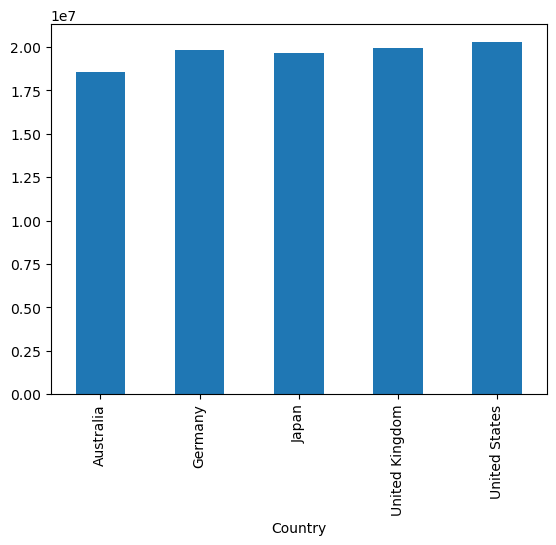

In [303]:
SalesByCountry.plot(kind='bar');

In [304]:
SalesBySP = df.groupby('Sales Person')['Sales Amount'].sum()
SalesBySP

Sales Person
Alice      20216678.02
Bob        19432012.45
Charlie    18415351.28
David      20147755.70
Eve        20072250.93
Name: Sales Amount, dtype: float64

<Axes: xlabel='Sales Person'>

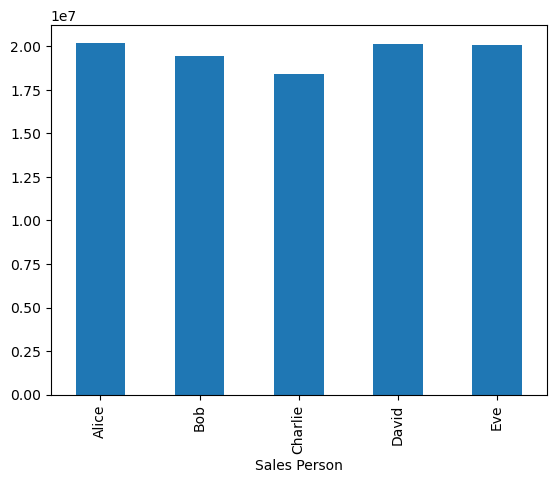

In [305]:
SalesBySP.plot(kind='bar')

In [307]:
df.to_parquet('s3://techcatalyst-transformed/SalesTransformed/tarek', partition_cols=['Country'],
                  storage_options={
                   'key' : AWS_ACCESS_KEY,
                   'secret' : AWS_SECRET_KEY
               })
